#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [249]:
import sklearn
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'1.0.2'

In [250]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [251]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [252]:
data.shape

(70000, 13)

In [253]:
df = data.sample(frac=0.25)

In [254]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
11584,16559,22530,1,153,65.0,130,80,3,1,0,0,1,1
61349,87592,21232,2,168,74.0,140,90,2,1,0,0,1,0
25150,35911,23156,1,147,58.0,160,100,3,2,0,0,1,0
40347,57671,23391,1,161,80.0,130,80,1,1,0,0,1,0
31057,44343,19671,1,165,70.0,120,80,1,3,0,0,1,0


In [255]:
df.shape

(17500, 13)

In [256]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 11584 to 23326
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


11584    22530
61349    21232
25150    23156
40347    23391
31057    19671
         ...  
9332     18307
64037    22629
69292    22752
18010    15289
23326    17344
Name: age, Length: 17500, dtype: int64

In [257]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
11584,16559,1,153,65.0,130,80,3,1,0,0,1,1,61.726027
61349,87592,2,168,74.0,140,90,2,1,0,0,1,0,58.169863
25150,35911,1,147,58.0,160,100,3,2,0,0,1,0,63.441096
40347,57671,1,161,80.0,130,80,1,1,0,0,1,0,64.084932
31057,44343,1,165,70.0,120,80,1,3,0,0,1,0,53.893151


In [258]:
df['height'] = df['height']/100

In [259]:
df['height']

11584    1.53
61349    1.68
25150    1.47
40347    1.61
31057    1.65
         ... 
9332     1.60
64037    1.54
69292    1.57
18010    1.58
23326    1.72
Name: height, Length: 17500, dtype: float64

In [260]:
df['bmi'] = df['weight']/((df['height'])**2)

In [261]:
del df['weight']
del df['height']

In [262]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
11584,16559,1,130,80,3,1,0,0,1,1,61.726027,27.767098
61349,87592,2,140,90,2,1,0,0,1,0,58.169863,26.218821
25150,35911,1,160,100,3,2,0,0,1,0,63.441096,26.840668
40347,57671,1,130,80,1,1,0,0,1,0,64.084932,30.863007
31057,44343,1,120,80,1,3,0,0,1,0,53.893151,25.711662


In [263]:
 df['bmi']

11584    27.767098
61349    26.218821
25150    26.840668
40347    30.863007
31057    25.711662
           ...    
9332     23.437500
64037    28.250970
69292    30.427198
18010    26.438071
23326    28.055706
Name: bmi, Length: 17500, dtype: float64

In [264]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
11584,1,130,80,3,1,0,0,1,1,27.767098,62.0
61349,2,140,90,2,1,0,0,1,0,26.218821,58.0
25150,1,160,100,3,2,0,0,1,0,26.840668,63.0
40347,1,130,80,1,1,0,0,1,0,30.863007,64.0
31057,1,120,80,1,3,0,0,1,0,25.711662,54.0


In [265]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
11584,1,130,80,3,1,0,0,1,1,28.0,62.0
61349,2,140,90,2,1,0,0,1,0,26.0,58.0
25150,1,160,100,3,2,0,0,1,0,27.0,63.0
40347,1,130,80,1,1,0,0,1,0,31.0,64.0
31057,1,120,80,1,3,0,0,1,0,26.0,54.0


In [266]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
11584,1,130,80,3,1,0,0,1,1,28.0,62.0
61349,2,140,90,2,1,0,0,1,0,26.0,58.0
25150,1,160,100,3,2,0,0,1,0,27.0,63.0
40347,1,130,80,1,1,0,0,1,0,31.0,64.0
31057,1,120,80,1,3,0,0,1,0,26.0,54.0


In [267]:
scaler = MinMaxScaler()

In [268]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [269]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
11584,0.0,0.158192,0.016358,1.0,0.0,0.0,0.0,1.0,1.0,0.062284,0.884615
61349,1.0,0.163842,0.017448,0.5,0.0,0.0,0.0,1.0,0.0,0.055363,0.730769
25150,0.0,0.175141,0.018539,1.0,0.5,0.0,0.0,1.0,0.0,0.058824,0.923077
40347,0.0,0.158192,0.016358,0.0,0.0,0.0,0.0,1.0,0.0,0.072664,0.961538
31057,0.0,0.152542,0.016358,0.0,1.0,0.0,0.0,1.0,0.0,0.055363,0.576923


Text(0.5, 1.0, 'Correlation Plot')

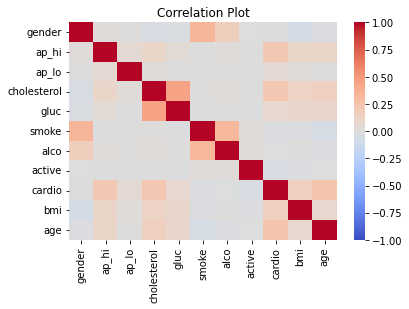

In [270]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

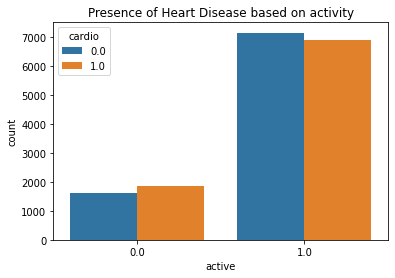

In [271]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

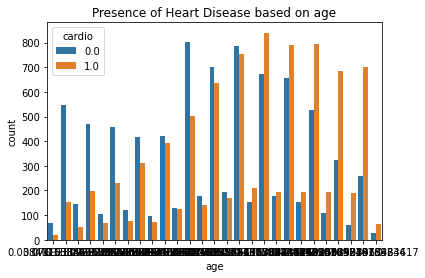

In [272]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

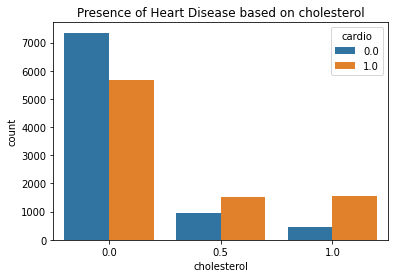

In [273]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [274]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [275]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [276]:
"""""X = df[list(df.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)'"""""
#High VIF indicates that there's multicollinearity

'""X = df[list(df.columns)]\nvif_info = pd.DataFrame()\nvif_info[\'VIF\'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif_info[\'Column\'] = X.columns\nvif_info.sort_values(\'VIF\', ascending=False)\''

## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA)
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### SMOTE

In [278]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (17500, 10)
Shape of X after SMOTE: (17512, 10)


In [279]:
rf = RandomForestClassifier()

In [280]:
rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [281]:
predrfc = rf.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = predrfc)

0.9165714285714286

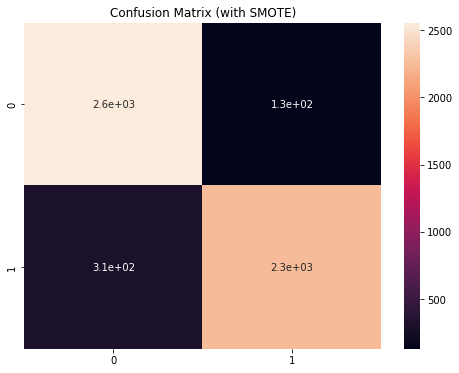

In [282]:
cm = confusion_matrix(y_test, predrfc)
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix (with SMOTE)')
sns.heatmap(cm, annot = True, cmap = 'rocket');

## Decision Trees

In [283]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [284]:
dt = DecisionTreeClassifier()

In [285]:
dt.fit(X_sm, y_sm)

DecisionTreeClassifier()

In [286]:
pred_train = dt.predict(X_sm)

In [287]:
print("Accuracy Train", metrics.accuracy_score(y_sm, pred_train))

Accuracy Train 0.9189698492462312


In [288]:
pred = dt.predict(X_test)

In [289]:
print("Accuracy Test", metrics.accuracy_score(y_test, pred))

Accuracy Test 0.9163809523809524


In [290]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      2686
         1.0       0.97      0.85      0.91      2564

    accuracy                           0.92      5250
   macro avg       0.92      0.91      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Decision Trees

## Random Forest Classifier

In [291]:
RF = RandomForestClassifier()

In [292]:
RF.fit(X_sm, y_sm)

RandomForestClassifier()

In [293]:
pred = RF.predict(X_sm)
metrics.accuracy_score(y_true = y_sm, y_pred = pred)

0.9189698492462312

In [294]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.9158095238095239

In [295]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2686
         1.0       0.95      0.88      0.91      2564

    accuracy                           0.92      5250
   macro avg       0.92      0.91      0.92      5250
weighted avg       0.92      0.92      0.92      5250



### Grid Search for Random Forest Classifier

In [296]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [297]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [369]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [370]:
grid.best_estimator_

GaussianNB(var_smoothing=2.848035868435799e-05)

In [371]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [372]:
rf.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [373]:
rf_pred = rf.predict(X_test)

In [374]:
print(confusion_matrix(y_test, rf_pred))

[[2147  539]
 [ 768 1796]]


In [375]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      2686
         1.0       0.77      0.70      0.73      2564

    accuracy                           0.75      5250
   macro avg       0.75      0.75      0.75      5250
weighted avg       0.75      0.75      0.75      5250



Shows an accuracy of 0.73 and precision of 0.75 and recall of 0.66

## Naive Bayes

In [299]:
from sklearn.naive_bayes import GaussianNB

In [300]:
g = GaussianNB()

In [301]:
g.fit(X_sm, y_sm)

GaussianNB()

In [302]:
pred = g.predict(X_sm)
metrics.accuracy_score(y_sm, pred)

0.6159205116491548

In [303]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.6152380952380953

In [304]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.58      0.87      0.70      2686
         1.0       0.72      0.35      0.47      2564

    accuracy                           0.62      5250
   macro avg       0.65      0.61      0.58      5250
weighted avg       0.65      0.62      0.59      5250



### Grid Search for Naive Bayes

In [305]:
from sklearn.metrics import classification_report

In [306]:
parameters = {
    "priors": [None],
    "var_smoothing": np.logspace(0,-9, num = 100)
}

In [307]:
grid = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [308]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [309]:
grid.best_estimator_

GaussianNB(var_smoothing=2.848035868435799e-05)

In [310]:
GNB = GaussianNB(var_smoothing=0.657933224657568)

In [311]:
GNBNew_pred = g.predict(X_test)

In [312]:
print(confusion_matrix(y_test, GNBNew_pred))

[[2330  356]
 [1664  900]]


In [313]:
print(classification_report(y_test, GNBNew_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.87      0.70      2686
         1.0       0.72      0.35      0.47      2564

    accuracy                           0.62      5250
   macro avg       0.65      0.61      0.58      5250
weighted avg       0.65      0.62      0.59      5250



## Support Vector Machines

In [314]:
from sklearn.svm import SVC

In [315]:
estimator = SVC(kernel ='rbf')

In [316]:
estimator.fit(X_sm, y_sm)

SVC()

In [317]:
pred = estimator.predict(X_sm)

In [318]:
svm = metrics.accuracy_score(y_sm, pred)

In [319]:
svm_pred2 = estimator.predict(X_test)

In [320]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [321]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6576633165829145
Testing Accuracy: 0.6575238095238095


In [322]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68      2686
         1.0       0.67      0.60      0.63      2564

    accuracy                           0.66      5250
   macro avg       0.66      0.66      0.66      5250
weighted avg       0.66      0.66      0.66      5250



### Grid Search for Support Vector Machines

In [323]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [324]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [354]:
cv_1.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})

In [355]:
cv_1.best_estimator_

SVC(C=1000)

In [356]:
svc = SVC(C=1000, kernel='linear')

In [357]:
svc.fit(X_sm, y_sm)

SVC(C=1000, kernel='linear')

In [358]:
svc_pred = svc.predict(X_test)

In [359]:
print(confusion_matrix(y_test, svc_pred))

[[2202  484]
 [ 983 1581]]


In [360]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75      2686
         1.0       0.77      0.62      0.68      2564

    accuracy                           0.72      5250
   macro avg       0.73      0.72      0.72      5250
weighted avg       0.73      0.72      0.72      5250



## Ada Boost Classifier ##

In [326]:
from sklearn.ensemble import AdaBoostClassifier

In [327]:
from sklearn.metrics import accuracy_score

In [328]:
AdaBoostClassifier()

AdaBoostClassifier()

In [329]:
abc = AdaBoostClassifier()
abc.fit(X_sm, y_sm)

AdaBoostClassifier()

In [330]:
abc_pred_train = abc.predict(X_sm)
accuracy_score(y_sm, y_pred=abc_pred_train) #training accuracy

0.7368661489264504

In [331]:
abc_pred_test = abc.predict(X_test)
accuracy_score(y_test, y_pred=abc_pred_test) #testing accuracy

0.732

In [332]:
cm_abc = confusion_matrix(y_test, abc_pred_test)
print(cm_abc)

[[2157  529]
 [ 878 1686]]


In [333]:
print(metrics.classification_report(y_true = y_test, y_pred = abc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2686
           1       0.76      0.66      0.71      2564

    accuracy                           0.73      5250
   macro avg       0.74      0.73      0.73      5250
weighted avg       0.74      0.73      0.73      5250



### Grid Search for Ada Boost

In [334]:
parameters = {
    'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
    'n_estimators': [50, 60, 70, 80, 90]
}

In [335]:
ab_gs = GridSearchCV(abc, parameters, cv=3, n_jobs=-1)

In [361]:
ab_gs.fit(X_sm, y_sm)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [2, 4, 6, 8, 10, 12, 14, 16],
                         'n_estimators': [50, 60, 70, 80, 90]})

In [362]:
ab_gs.best_estimator_

AdaBoostClassifier(learning_rate=14)

In [363]:
ab_1 = AdaBoostClassifier(learning_rate=6)

In [364]:
ab_1.fit(X_sm, y_sm)

AdaBoostClassifier(learning_rate=6)

In [365]:
ab_1_pred = ab_1.predict(X_test)

In [366]:
print(confusion_matrix(y_test, ab_1_pred))

[[ 498 2188]
 [1577  987]]


In [367]:
print(metrics.classification_report(y_test, ab_1_pred))

              precision    recall  f1-score   support

         0.0       0.24      0.19      0.21      2686
         1.0       0.31      0.38      0.34      2564

    accuracy                           0.28      5250
   macro avg       0.28      0.29      0.28      5250
weighted avg       0.27      0.28      0.28      5250



## Support Vector Machines (PCA)



In [337]:
from sklearn.decomposition import PCA

In [338]:
pca = PCA(n_components=None)

pca.fit(X_sm)
X_train_pca = pca.transform(X_sm)
X_test_pca = pca.transform(X_test)

[0.31158076 0.51287204 0.70229253 0.80047454 0.88153932 0.94765125
 0.99812958 0.99886112 0.99953495 1.        ]


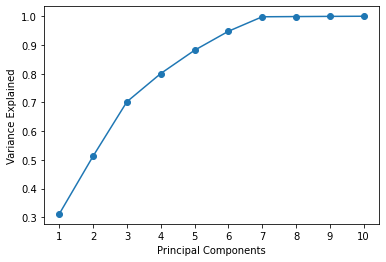

In [339]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [340]:
X_train_pca2 = X_train_pca[:, 0:11]
X_test_pca2 = X_test_pca[:, 0:11]

In [341]:
from sklearn.svm import SVC

In [342]:
estimator_svc = SVC(kernel ='rbf')

In [343]:
estimator_svc.fit(X_train_pca,y_sm)

SVC()

In [344]:
pred = estimator_svc.predict(X_train_pca)

In [345]:
svm = metrics.accuracy_score(y_sm,pred)

In [346]:
pred2 = estimator_svc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [347]:
svm1 = metrics.accuracy_score(y_test,pred2)

In [348]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6624029237094564
Testing Accuracy: 0.48838095238095236


In [349]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.50      0.00      0.01      2686
         1.0       0.49      1.00      0.66      2564

    accuracy                           0.49      5250
   macro avg       0.49      0.50      0.33      5250
weighted avg       0.49      0.49      0.32      5250



### Grid Search for SVM (PCA)

In [350]:
param_pca = {'C': [1,10,100,1000],
              'gamma': [0.001,0.0001,1]}

In [351]:
gs = GridSearchCV(estimator = estimator_svc, param_grid = 
param_pca, cv = 5, n_jobs = -1)

In [376]:
gs.fit(X_train_pca2, y_sm)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 1]})

In [377]:
gs.best_estimator_

SVC(C=1000, gamma=1)

In [378]:
pca_new =SVC(C = 1000, gamma = 1)

In [379]:
pca_new.fit(X_train_pca2 ,y_sm)

SVC(C=1000, gamma=1)

In [380]:
pca_new1 = pca_new.predict(X_test_pca2)

In [381]:
print(metrics.classification_report(y_test, pca_new1))

              precision    recall  f1-score   support

         0.0       0.73      0.79      0.76      2686
         1.0       0.76      0.70      0.72      2564

    accuracy                           0.74      5250
   macro avg       0.74      0.74      0.74      5250
weighted avg       0.74      0.74      0.74      5250



## Final Data Visualizations